In [121]:
# Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import stats
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline
matplotlib.style.use('ggplot')
from APIkey import gkey
import gmaps
gmaps.configure(api_key=gkey)


ModuleNotFoundError: No module named 'APIkey'

In [ ]:
#Bring in the csv file created from the Crime Data and convert to a dataframe
csvpath = os.path.join("Yelp_reformat.csv")
#crime_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df.columns=['County', 'Crime Rate per 100k', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary',
                   'Larceny', 'MV Theft', 'Arson', 'Population', 'Avg_Rating','Median_Rating','Avg_Price',
                    'Rest_Count', 'Avg_Lat', 'Avg_Lng', 'CountyName', 'State']
yelptest_df.head()

In [123]:
#Create df
yelptest_df["Total_Crime"] = yelptest_df['Murder'] + yelptest_df['Assault'] + yelptest_df['Rape'] + yelptest_df['MV Theft'] + yelptest_df['Arson'] + yelptest_df['Larceny'] + yelptest_df['Burglary']\
                            + yelptest_df['Robbery']
                           
yelptest_df["yelpratingcount"] = yelptest_df["Avg_Rating"]*yelptest_df["Rest_Count"]

#Create df
state_df = yelptest_df.groupby(["State"]).agg({'Murder':np.sum, 'Rape':np.sum, 'Robbery':np.sum, 'Assault':np.sum, 'Burglary':np.sum,
                   'Larceny':np.sum, 'MV Theft':np.sum, 'Arson':np.sum, 'Total_Crime':np.sum, 'Rest_Count':np.sum, 'yelpratingcount':np.sum, 'Population':np.sum})
state_df["AvgTotalRating"] = state_df["yelpratingcount"]/state_df["Rest_Count"]
state_df.head()


,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,Total_Crime,Rest_Count,yelpratingcount,Population,AvgTotalRating
State,,,,,,,,,,,,,
AK,18,361,562,2083,1617,12805,1088,126,18660,304,1239.0,633989,4.075658
AL,341,1283,4988,14857,46928,109949,9757,1025,189128,2147,8256.5,4833722,3.845599
AR,172,1210,2256,9666,31742,68683,5513,558,119800,1913,7108.5,2907378,3.715891
AZ,325,1725,7263,16638,50486,130487,17683,1405,226012,606,2415.0,6626624,3.985149
CA,1851,7711,55825,93376,241236,628115,166082,7277,1201473,2373,9795.5,37907733,4.127897


In [ ]:
yelptest_df["Murder_per_10K"] = yelptest_df["Murder"]/yelptest_df["Population"]*10000
yelptest_df["Robbery_per_10K"] = yelptest_df["Robbery"]/yelptest_df["Population"]*10000
yelptest_df["Burglary_per_10K"] = yelptest_df["Burglary"]/yelptest_df["Population"]*10000
yelptest_df["MV_Theft_per_10K"] = yelptest_df["MV Theft"]/yelptest_df["Population"]*10000



yelptest_df.head()

In [ ]:
bins = [0, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000, 9999999999999999] # first is less than or equal to 60
group_names = ["<1K", "1K-5K", "5K-10K", "10K-25K", "25K-50K","50K-100K","100K-250K","250K-500K","500K-1M",">1M"] # One less than the bin
yelptest_df["pop_groups"] = pd.cut(yelptest_df["Population"], bins, labels=group_names) 
#You can then get data by that binned column
df_pop_groups = yelptest_df.groupby("pop_groups")

df_pop_groups["Avg_Rating"].sum()

In [ ]:
# Take out the very low and high population areas
# stateyelp_df =  yelptest_df[yelptest_df.State.isin(["CA"])]
# stateyelp_df = yelptest_df.loc[yelptest_df["Rest_Count"] == 50, :]
stateyelp_df = yelptest_df.loc[yelptest_df["Rest_Count"] != 50, :]
# stateyelp_df =  yelptest_df

# newyelp_df = stateyelp_df[~stateyelp_df.pop_groups.isin(["<1K", ">1M"])]
newyelp_df = stateyelp_df[stateyelp_df.pop_groups.isin(["25K-50K"])]

print (newyelp_df["Population"].min())
print (newyelp_df["Population"].max())

In [ ]:
pop = newyelp_df["Population"]
murder = newyelp_df["Murder_per_10K"]
crime = newyelp_df["Crime Rate per 100k"]
rating = newyelp_df["Avg_Rating"]
robbery = newyelp_df["Robbery_per_10K"]
burglary = newyelp_df["Burglary_per_10K"]
MV_theft = newyelp_df["MV_Theft_per_10K"]


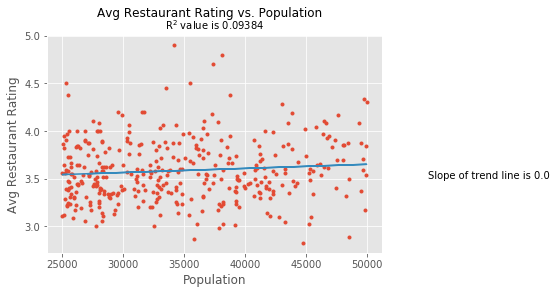

In [113]:
#Compare population to the avg rating
x=pop
y=rating
c = (pop).corr(rating)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Avg Restaurant Rating vs. Population",fontsize=12)
plt.xlabel("Population")
plt.ylabel("Avg Restaurant Rating")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (55000,3.5,"Slope of trend line is " + str(round(m, 5)))


plt.savefig("img_pop_rating.png")
plt.show()

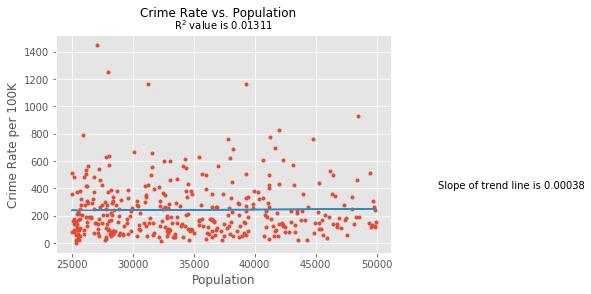

In [115]:
#Compare Crime per 100K to the population
x=pop
y=crime
c = (pop).corr(crime)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Crime Rate vs. Population",fontsize=12)
plt.xlabel("Population")
plt.ylabel("Crime Rate per 100K")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (55000,400,"Slope of trend line is " + str(round(m, 5)))


plt.savefig("img_pop_crime.png")

plt.show()

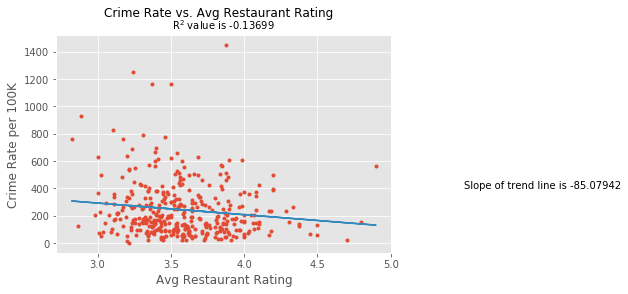

In [116]:
#Compare Crime per 100K to the avg rating
x=rating
y=crime
c = (rating).corr(crime)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Crime Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Crime Rate per 100K")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (5.5,400,"Slope of trend line is " + str(round(m, 5)))


plt.savefig("img_crime_rating.png")

plt.show()

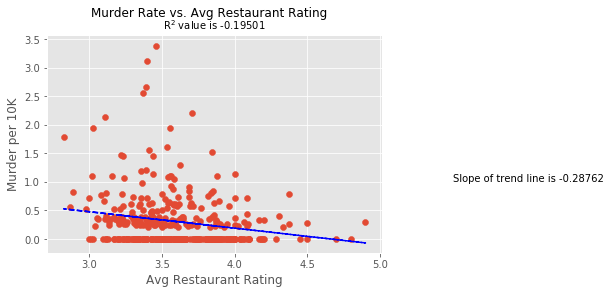

In [111]:
#Compare Murder per 10K to the avg rating
(slope, intercept, r_value, _, _) = stats.linregress(rating, murder)
line = slope * rating + intercept
plt.scatter(x=rating, y=murder)
plt.plot(rating, line, 'b--')

plt.suptitle("Murder Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Murder per 10K")
plt.title ("R$^2$ value is "+ str(round(r_value,5)),fontsize=10)
plt.text (5.5,1,"Slope of trend line is " + str(round(slope, 5)))

plt.savefig("img_murder_rating.png")

plt.show()


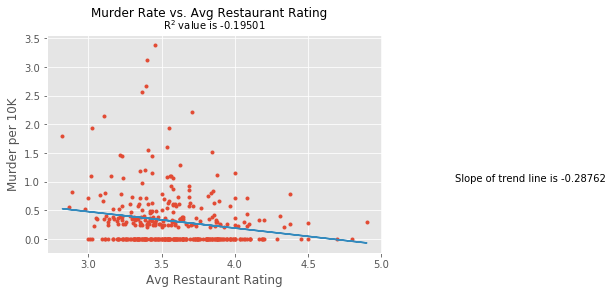

In [110]:
#Compare Murder per 10K to the avg rating
x=rating
y=murder
c = (rating).corr(murder)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Murder Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Murder per 10K")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (5.5,1,"Slope of trend line is " + str(round(m, 5)))

plt.savefig("img_murder_rating.png")

plt.show()


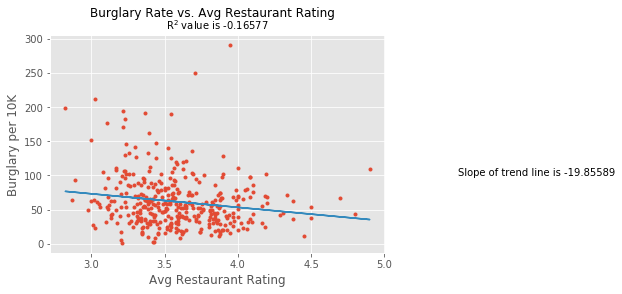

In [108]:
#Compare Burglary per 10K to the avg rating
x=rating
y=burglary
c = (rating).corr(burglary)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.suptitle("Burglary Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Burglary per 10K")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (5.5,100,"Slope of trend line is " + str(round(m, 5)))

plt.savefig("img_burglary_rating.png")

plt.show()

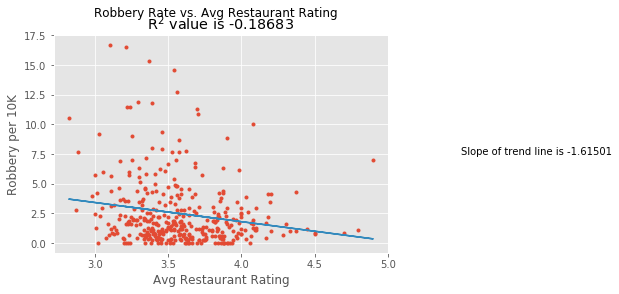

In [102]:
#Compare Robbery to Avg Yelp Rating
x=rating
y=robbery
c = (rating).corr(robbery)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("Robbery Rate vs. Avg Restaurant Rating")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Robbery per 10K")
plt.title ("R$^2$ value is "+ str(round(c,5)))
plt.text (5.5,7.5,"Slope of trend line is " + str(round(m, 5)))

plt.savefig("img_MV_theft_rating.png")

plt.show()

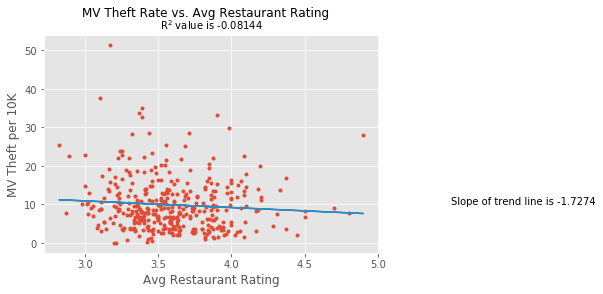

In [104]:
#Compare MV Theft to Avg Yelp Rating
x=rating
y=MV_theft
c = (rating).corr(MV_theft)
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.suptitle("MV Theft Rate vs. Avg Restaurant Rating",fontsize=12)
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("MV Theft per 10K")
plt.title ("R$^2$ value is "+ str(round(c,5)),fontsize=10)
plt.text (5.5,10,"Slope of trend line is " + str(round(m, 5)))

plt.savefig("img_MV_theft_rating.png")

plt.show()



In [105]:
newyelp_df = newyelp_df.reset_index (drop = True)

In [106]:
# Create a list of coordinates
Avg_Lat = list(newyelp_df["Avg_Lat"])
Avg_Lng = list(newyelp_df["Avg_Lng"])
Crime_rate = list(crime)

# coordinates = zip(newyelp_df["Avg_Lat"], newyelp_df["Avg_Lng"])
coordinates = newyelp_df[["Avg_Lat", "Avg_Lng"]]
# coordinates = []
# for i in range(0, len(Avg_Lat)):
#     zip(Avg_Lat[i], Avg_Lng[i])
#     coordinates.append("(" + str(Avg_Lat[i]) + ", " + str(Avg_Lng[i])+ ")")
#     coordinates.append(str(Avg_Lat[i]) + ", " + str(Avg_Lng[i]))

print(Crime_rate [1])
# print (coordinates [1])

print(coordinates)

# coord_tuple = tuple(coordinates)

1253.437132
       Avg_Lat     Avg_Lng
0    32.065037  -93.699333
1    34.608735  -79.684026
2    34.435796  -79.360599
3    37.112378  -89.541352
4    34.196854  -97.153639
5    32.417220  -87.040228
6    38.289068  -80.842398
7    31.117242  -92.066030
8    35.695844  -89.996147
9    32.903347  -80.675409
10   27.828199  -98.076549
11   36.051967  -89.391311
12   31.608199  -81.886014
13   33.523967  -90.202001
14   35.659215  -88.390574
15   35.746451  -89.545795
16   35.952086  -83.189746
17   31.127612  -87.069907
18   35.436418  -93.522977
19   37.643758 -117.079527
20   33.197619  -92.609375
21   33.672122  -79.827589
22   34.706482  -81.195108
23   43.605163  -85.307603
24   34.718983  -81.643168
25   35.256620  -88.993173
26   35.762097  -91.627336
27   32.896111  -85.412255
28   36.457327  -83.586037
29   33.691682  -80.225700
..         ...         ...
343  33.043247  -86.917505
344  40.535809  -84.568781
345  42.146794  -92.045473
346  45.558562  -93.237672
347  43.580456  

In [107]:
# Create a heat map of crime rates
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=crime, max_intensity=600)
fig.add_layer(heat_layer)
plt.savefig("img_crime_heat.png")
fig

NameError: name 'gmaps' is not defined

In [ ]:
# Create a heat map of ratings
fig = gmaps.figure() 
heat_layer = gmaps.heatmap_layer(coordinates, weights=rating, max_intensity=5)
fig.add_layer(heat_layer)
plt.savefig("img_ratings_heat.png")
fig